# ANZ Virtual Internship Report
## Task 1 : EDA

- The dataset contains 12043 transactions for 100 customers who have one bank account each. Trasactional period is 92 days duration from (01/08/2018 - 31/10/2018). The data entries are unique and have consistent formats for analysis. For each record (row), information is complete for majority of columns. Some columns contain missing data (blank or NA cells), which is likely due to the nature of transaction. (i.e. merchants are not involved for InterBank transfers or Salary payments). It is also noticed that there is only 91 unique dates in the dataset, suggesting the transaction records for one day are missing (turned out to be 2018-08-16). 

### - Load the libraries used for the tasks :

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas
import ast
from shapely import geometry
from shapely import wkt
from shapely.ops import cascaded_union
import folium
from sklearn.cluster import DBSCAN
from dateutil.parser import parse
import datetime
from rtree import index
from mpl_toolkits.basemap import Basemap

%matplotlib inline
sns.set(style="whitegrid")

### - Load the dataset :

In [3]:
df = pd.read_excel('ANZ_DATASET.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### - Data Shape :

In [4]:
print('Data Shape: \n',df.shape)

Data Shape: 
 (12043, 23)


### - Variables Types :

In [6]:
print('Variables Types : \n',df.dtypes)

Variables Types : 
 status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object


### - Basic statistical details :

In [7]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


### - Count distinct observations :

In [8]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

### - Unique values of "merchant_suburb" :

In [9]:
df['merchant_suburb'].value_counts()

Melbourne        255
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
                ... 
Melton South       1
Victor Harbor      1
Moranbah           1
North Hobart       1
Clunes             1
Name: merchant_suburb, Length: 1609, dtype: int64

### - Sum of null values :

In [10]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

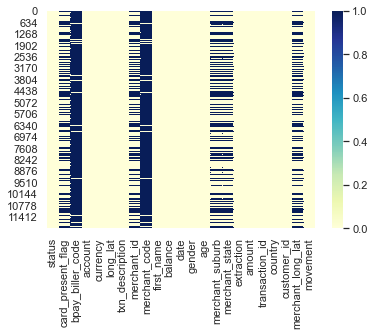

In [11]:
sns.heatmap(df.isnull(), cmap="YlGnBu")
plt.show()

In [12]:
df = df.drop(['merchant_code', 'bpay_biller_code'], axis=1)

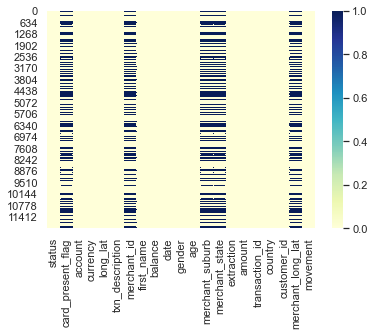

In [13]:
sns.heatmap(df.isnull(), cmap="YlGnBu")
plt.show()

### - Average transaction amount :

In [14]:
amount = df['amount']
avg_transaction_amount = amount.sum()/amount.count()
print('Average Transaction Amount = ', avg_transaction_amount)

Average Transaction Amount =  187.93358797641784


#### - Histogram of transaction amount :

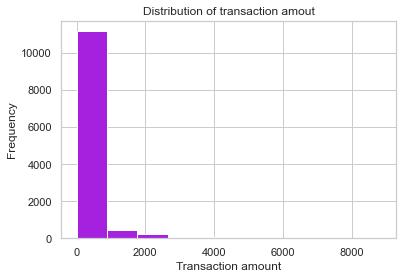

In [15]:
plt.hist(df.amount, bins=10, color="#a521de")
plt.xlabel('Transaction amount')
plt.ylabel('Frequency')
plt.title('Distribution of transaction amout')
plt.show()

### - Average Male/Female Salary :

In [16]:
salary_trans = df[df['txn_description']=='PAY/SALARY']
male_salary=salary_trans[salary_trans['gender']=='M']
female_salary=salary_trans[salary_trans['gender']=='F']

average_male_salary=male_salary['amount'].values.mean()
average_female_salary=female_salary['amount'].values.mean()
print('Average Male Salary :',average_male_salary,'\n')
print('Average Female Salary :',average_female_salary)

Average Male Salary : 2096.811681034483 

Average Female Salary : 1679.370477326969


#### - Histogram of male salary amount :

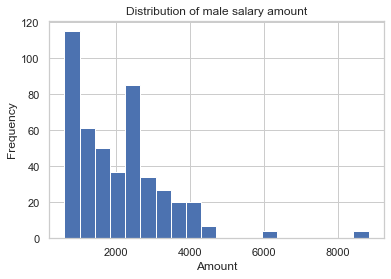

In [17]:
plt.hist(male_salary['amount'], bins=20, color="b")
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of male salary amount')
plt.show()

#### - Histogram of female salary amount :

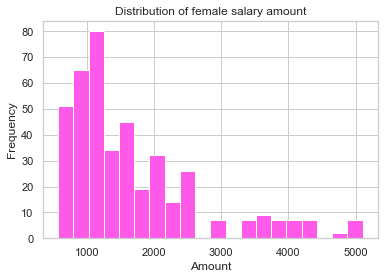

In [18]:
plt.hist(female_salary['amount'],bins=20, color="#ff59e9")
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of female salary amount')
plt.show()

### - Visualizing statistical relationships between "balance" & "card_present_flag" :

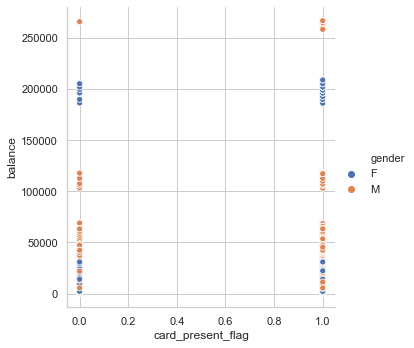

In [19]:
sns.relplot(x='card_present_flag', y='balance', hue='gender', data=df)
plt.show()

### - Distribution of "Balance" :

#### - Distribution plot :

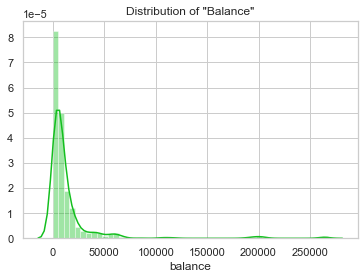

In [20]:
sns.distplot(df['balance'], color="#13bf1e")
plt.title('Distribution of "Balance"')
plt.show()

#### - Box plot :

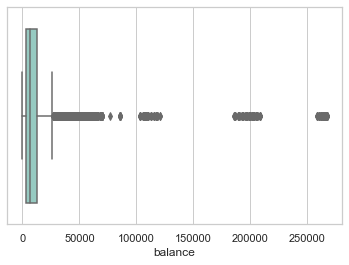

In [21]:
sns.boxplot(df['balance'], palette="Set3")
plt.show()

### - Distribution of "Age" :

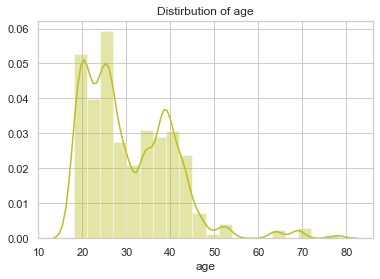

In [22]:
sns.distplot(df['age'], color="#babf22" ,bins=20)
plt.title('Distirbution of age')
plt.show()

### - Locations of all POS & POS-Sales :

#### - Functions to build a shapely point geometry based on the longitude and latitude values : 

In [23]:
def build_geometry(data):

    location=data['merchant_long_lat']
    if type(location) is str:
        longitude=location.split()[0]
        longitude=float(ast.literal_eval(longitude))
        latitude=location.split()[1]
        latitude=float(ast.literal_eval(latitude))
        if longitude==0 and latitude==0:
            return None
        else:    
            return geometry.Point(longitude, latitude)
    else:
        return None
    
    
def build_longitude(data):

    location=data['merchant_long_lat']
    if type(location) is str:
        longitude=location.split()[0]
        longitude=float(ast.literal_eval(longitude))
        latitude=location.split()[1]
        latitude=float(ast.literal_eval(latitude))
        if longitude==0 and latitude==0:
            return 0
        else:    
            return longitude
    else:
        return 0

    
def build_latitude(data):

    location=data['merchant_long_lat']
    if type(location) is str:
        longitude=location.split()[0]
        longitude=float(ast.literal_eval(longitude))
        latitude=location.split()[1]
        latitude=float(ast.literal_eval(latitude))
        if longitude==0 and latitude==0:
            return 0
        else:    
            return latitude
    else:
        return 0

In [24]:
df['geometry'] = df.apply(build_geometry, axis=1)
df['longitude'] = df.apply(build_longitude, axis=1)
df['latitude'] = df.apply(build_latitude, axis=1)
anz_transactions_pos_pos_sales = df.loc[df['geometry'].notnull()]
anz_transactions_pos_pos_sales = geopandas.GeoDataFrame(anz_transactions_pos_pos_sales, geometry=anz_transactions_pos_pos_sales.geometry)
anz_transactions_pos_pos_sales.crs = {'init': 'epsg:4326', 'no_defs': True}

C:\Users\Mehdi\anaconda3\envs\venv\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [25]:
y=df['latitude'].values
x=df['longitude'].values
x_axis_label=''
y_axis_label=''
print(x[0])
print(y[0])

153.38
-27.99


#### - Locations of all the POS & POS-SALES :

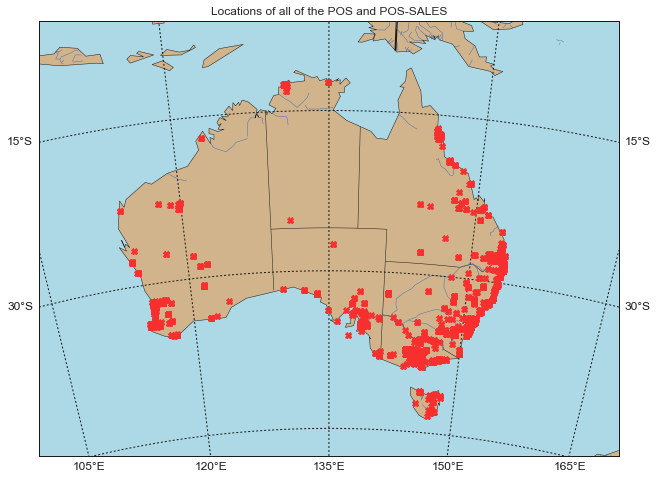

In [26]:
fig = plt.figure(num=None, figsize=(12, 8)) 
ax=fig.add_subplot()
ax.set_title('Locations of all of the POS and POS-SALES')
map=Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lon_0=135,lat_0=-27)
map.drawmapboundary(fill_color='lightblue')
map.fillcontinents(color='tan',lake_color='lightblue')
map.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
map.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
map.drawmapboundary(fill_color='lightblue')
map.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
map.drawstates(linewidth=0.5, linestyle='solid', color='k')
map.drawrivers(linewidth=0.5, linestyle='solid', color='b')
map.drawcoastlines(linewidth=0.5)
for i,coord in enumerate(x):
    x1, y1 = map(x[i],y[i])
    map.plot(x1, y1, marker='X',color='#f72f2f')
plt.show()